#텐서플로우로 시작하는 딥러닝 기초

###Lab 02: Simple Linear Regression 를 TensorFlow 로 구현하기

Build hypothesis and cost

H(x) = Wx + b

cost(W, b) = 차이의 제곱의 평균

In [ ]:
import tensorflow as tf
#tf.enable_eager_execution()

# Data
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

# W, b initialize
# 보통은 random값으로 지정한다.
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# learning_rate initialize
# grad값을 얼마만큼 반영할지를 결정.
# 보통 매우 작은 값을 사용함.
learning_rate = 0.01

minimize cost(W,b)를 만족하는 W, b 찾기

(Gradient descent, 경사 하강법)

In [ ]:
# 아래의 과정을 여러 차례 거쳐서 W, b값을 결정함.
for i in range(100+1):
  # Gradient descent
  # 아래 블록의 변화를 tape에 기록.
  with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    # reduce_mean : 평균을 구하는 함수로, 평균을 구하면서 차원을 하나 낮춘다.
    # 예) 1차원 배열을 넣는 경우 0차원의 값으로 결과가 나온다.
    # 아래는 cost 함수.
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  # cost 함수에서 W, b에 대한 개별 미분값을 순서대로 구함.
  # 각각 W의 기울기, b의 기울기가 됨.
  W_grad, b_grad = tape.gradient(cost, [W, b])

  # W값, b값을 업데이트
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  #10번째 시행마다 변화하는 값을 출력
  if i % 10 == 0:
    print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|    2.4520|     0.376| 45.660004
   10|    1.1036|  0.003398|  0.206336
   20|    1.0128|  -0.02091|  0.001026
   30|    1.0065|  -0.02184|  0.000093
   40|    1.0059|  -0.02123|  0.000083
   50|    1.0057|  -0.02053|  0.000077
   60|    1.0055|  -0.01984|  0.000072
   70|    1.0053|  -0.01918|  0.000067
   80|    1.0051|  -0.01854|  0.000063
   90|    1.0050|  -0.01793|  0.000059
  100|    1.0048|  -0.01733|  0.000055


In [ ]:
# 5와 2.5를 x값으로 넣어서, y값이 각각 5와 2.5에 가깝게 나오는지 체크.
print(W*5+b)
print(W*2.5+b)

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)


### Lab 03: Linear Regression and How to minimize cost 를 TensorFlow 로 구현하기

1. Numpy를 이용해서 Cost 함수 구현

In [ ]:
# Numpy만 가지고 구현해본 것.
import numpy as np

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

# Cost 함수를 Python 함수로 구현.
# Cost 함수는 (실제값과 함수값의 차이)^2의 평균.
def cost_func(W, X, Y):
  c = 0
  for i in range(len(X)):
    c += (W * X[i] - Y[i]) ** 2
  return c / len(X)

# -3 ~ 5사이를 15개의 구간으로 나누고, 이 값을 feed_W에 넣는다.
# W값에 따라 Cost함수가 어떤 결과값을 가지는지 출력해본 것.
for feed_W in np.linspace(-3, 5, num=15):
  curr_cost = cost_func(feed_W, X, Y)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


2. Tensorflow를 이용해서 Cost 함수 구현

In [ ]:
# Tensorflow로 구현해본 것
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

# Cost 함수를 Python 함수로 구현.
# Cost 함수는 (실제값과 함수값의 차이)^2의 평균.
def cost_func(W, X, Y):
  hypothesis = X * W #원래는 +b도 있지만 여기서는 b를 생략해서 간략화.
  return tf.reduce_mean(tf.square(hypothesis - Y))

cost_values = []

# -3 ~ 5사이를 15개의 구간으로 나누고, 이 값을 feed_W에 넣는다.
# W값에 따라 Cost함수가 어떤 결과값을 가지는지 출력해본 것.
for feed_W in np.linspace(-3, 5, num=15):
  curr_cost = cost_func(feed_W, X, Y)
  cost_values.append(curr_cost)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


3. Gradient descent 구현

In [ ]:
# Random 함수의 seed값을 초기화.
# 다음에 이 코드를 다시 수행했을 때에도 동일하게 재현될 수 있도록 random seed를 특정 값을 줌.
tf.random.set_seed(0)

x_data = [1., 2., 3., 4.]
y_data = [1., 2., 3., 4.]

# 정규분포를 따르는 random number를 1개 만듬.
# W값이 얼마이던 동일한 결과로 수렴해 간다.
W = tf.Variable(tf.random.normal([1], -100., 100.))

# Gradient descent를 300번 수행
for step in range(300):
  # hypothesis, cost 함수 정의
  hypothesis = W * x_data
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  # 아래가 gradient descent.
  alpha = 0.01
  # gradient는 기울기로, Cost 함수의 미분값을 의미.
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, x_data) - y_data, x_data))
  # descent는 최종 값으로, W - a*기울기.
  # 새로운 W값이기도 하다.
  descent = W - tf.multiply(alpha, gradient)
  # W값 업데이트.
  W.assign(descent)

  # 10번에 1번씩 cost, W값 출력
  if step % 10 == 0:
    print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), W.numpy()[0]))

    0 | 18829.7812 |  47.348293
   10 |  3959.8613 |  22.254509
   20 |   832.7499 |  10.746943
   30 |   175.1255 |   5.469776
   40 |    36.8285 |   3.049760
   50 |     7.7449 |   1.939984
   60 |     1.6287 |   1.431060
   70 |     0.3425 |   1.197676
   80 |     0.0720 |   1.090651
   90 |     0.0151 |   1.041571
  100 |     0.0032 |   1.019064
  110 |     0.0007 |   1.008742
  120 |     0.0001 |   1.004009
  130 |     0.0000 |   1.001839
  140 |     0.0000 |   1.000843
  150 |     0.0000 |   1.000387
  160 |     0.0000 |   1.000178
  170 |     0.0000 |   1.000081
  180 |     0.0000 |   1.000037
  190 |     0.0000 |   1.000017
  200 |     0.0000 |   1.000008
  210 |     0.0000 |   1.000004
  220 |     0.0000 |   1.000002
  230 |     0.0000 |   1.000001
  240 |     0.0000 |   1.000001
  250 |     0.0000 |   1.000001
  260 |     0.0000 |   1.000001
  270 |     0.0000 |   1.000001
  280 |     0.0000 |   1.000001
  290 |     0.0000 |   1.000001


### Lab 04: Multi-variable Linear Regression 를 TensorFlow 로 구현하기

기존의 방식으로, 행렬을 쓰지 않고 구현

In [ ]:
import numpy as np
import tensorflow as tf

# data and label
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 93., 90., 100., 70.]
Y = [152., 185., 180., 196., 142.]

# random weights
w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

for i in range(1000+1):
  # tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    hypothesis = w1*x1 + w2*x2 + w3*x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

  # calculates the gradients of the cost
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

  # update w1, w2, w3 and b
  w1.assign_sub(learning_rate * w1_grad)
  w2.assign_sub(learning_rate * w2_grad)
  w3.assign_sub(learning_rate * w3_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 50 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 |   56661.3125
   50 |     637.1641
  100 |      15.4974
  150 |       8.5788
  200 |       8.4816
  250 |       8.4601
  300 |       8.4395
  350 |       8.4189
  400 |       8.3985
  450 |       8.3781
  500 |       8.3577
  550 |       8.3373
  600 |       8.3171
  650 |       8.2969
  700 |       8.2768
  750 |       8.2566
  800 |       8.2366
  850 |       8.2167
  900 |       8.1967
  950 |       8.1768
 1000 |       8.1570


행렬을 써서 구현

In [ ]:
# 데이터를 행렬에 넣음.
data = np.array([
                 # X1, X2, X3, y
                 [73., 80., 75., 152.],
                 [93., 88., 93., 185.],
                 [89., 91., 90., 180.],
                 [96., 98., 100., 196.],
                 [73., 66., 70., 142.]
], dtype=np.float32)

# 데이터를 slice. 이 때 X, Y 또한 행렬이 된다.
# X는 input, Y는 label/출력.
# [행(세로), 열(가로)]. ':-1'이면 마지막을 제외하고 전부 가져옴.
# ':' 상태이면 처음부터 끝까지 가져옴.
# [-1]이면 마지막만 가져옴.
X = data[:, :-1]
y = data[:, [-1]]

# W는 가중치 3개가 들어간 행렬. 출력값은 1개.
W = tf.Variable(tf.random.normal([3, 1]))
# bias(Y절편)은 생략 가능.
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

# hypothesis, prediction function
# matmul(arg1, arg2) 함수는 arg1 X arg2의 행렬곱을 수행한다.
# bias(Y절편)은 생략 가능.
def predict(X):
  return tf.matmul(X, W) + b

# Cost 최소값 찾기
for i in range(2000+1):
  # record the gradient of the cost function
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean((tf.square(predict(X) - y)))

  # calculates the gradients of the loss
  W_grad, b_grad = tape.gradient(cost, [W, b])

  # updates parameters (W, b)
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print("{:5} | {:10.4f}".format(i, cost.numpy()))

    0 |  4405.5991
  100 |     3.5644
  200 |     3.0082
  300 |     2.9939
  400 |     2.9799
  500 |     2.9659
  600 |     2.9520
  700 |     2.9381
  800 |     2.9244
  900 |     2.9107
 1000 |     2.8971
 1100 |     2.8835
 1200 |     2.8701
 1300 |     2.8566
 1400 |     2.8433
 1500 |     2.8301
 1600 |     2.8169
 1700 |     2.8038
 1800 |     2.7907
 1900 |     2.7778
 2000 |     2.7648


**행렬을 썼을 때가 코딩의 양이 훨씬 적은 것을 볼 수 있다.**

### Lab 05-3: Logistic Regression/Classification 를 TensorFlow로 구현하기

학습 데이터와 테스트 데이터 시각화

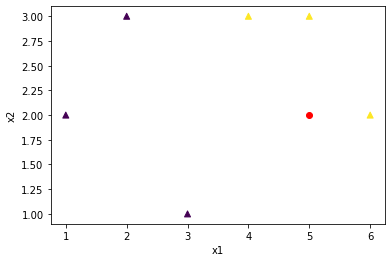

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 학습 데이터.
x_train = [[1., 2.], [2., 3.], [3., 1.], [4., 3.], [5., 3.], [6., 2.]]
y_train = [[0.], [0.], [0.], [1.], [1.], [1.]]

# 테스트 데이터.
x_test = [[5., 2.]]
y_test = [[1.]]

# x_train의 값에서 x1, x2 값 리스트를 가져옴.
x1 = [x[0] for x in x_train] #1,2,3, ...
x2 = [x[1] for x in x_train] #2,3,1, ...

# scatter 차트로 보여줌. 축은 x1과 x2, 테스트값은 red로 표시.
colors = [int(y[0]%3) for y in y_train]
plt.scatter(x1, x2, c=colors, marker='^')
colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x_test[0][0], x_test[0][1], c="red")

# 0의 값을 가지는 train_set은 보라색, 1의 값을 가지는 train_set은 노란색, test_set은 빨간색.
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

텐서플로를 이용해서 로지스틱 관계 만들기

In [ ]:
# 데이터셋을 구성함. (0, 0)[0]의 형태로 6개가 들어가게 됨.
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Weight, Bias를 초기화.
W = tf.Variable(tf.zeros([2,1]), name='weight') # Weight는 2행 1열.
b = tf.Variable(tf.zeros([1]), name='bias') # Bias는 상수.

# 가설함수
def logistic_regression(features):
  # hypothesis는 1 / 1 + e^(-x)
  # 여기서 x = tf.matmul(features, W) + b
  hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(features, W) + b))
  return hypothesis

# Loss Function = Cost Function
def loss_fn(hypothesis, labels):
  # cost(h(x), y) = -y*log(h(x)) - (1-y)log(1-h(x))
  # cost값 자체는 cost(h(x), y)를 전부 계산한 뒤 reduce_mean을 수행한다.
  cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
  return cost

# learning_rate를 선언해서 cost값 줄이는 것을 선언한다.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)


# 가설의 정확도를 측정하는 함
def accuracy_fn(hypothesis, labels):
  # predicted는 hypothesis > 0.5일 때 1, 아니면 0.
  predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
  # accuracy는 predicted와 labels이 얼마나 같은지를 계산한다.
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
  return accuracy

위에서 만든 함수로 실제 로지스틱 회귀 학습을 수행하고, 정확도 테스트하기

In [ ]:
# Gradient Descent를 구하는 함수.
# W, b의 기울기를 반환한다.
def grad(features, labels):
  with tf.GradientTape() as tape:
    hypothesis = logistic_regression(features)
    loss_value = loss_fn(hypothesis, labels)
  return tape.gradient(loss_value, [W, b])

EPOCHS = 1001
for step in range(EPOCHS): # 학습을 1000번 한다.
  for features, labels in iter(dataset.batch(len(x_train))): # 모든 데이터를 가져와서, 각 데이터를 1개씩 가져와서
    hypothesis = logistic_regression(features) # 각 번째에 대한 x/y값을 가져와서 가설을 구함
    grads = grad(features, labels) # 가설에 대한 W, b의 미분값을 구함
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b])) # 조금씩 cost(loss)의 최솟값을 향해 나아감
    if step % 100 == 0:
      print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(hypothesis, labels)))

# 만들어진 모델을 테스트
test_acc = accuracy_fn(logistic_regression(x_test), y_test) # x_test, y_test값을 넣어서 정상적으로 작동하는지 확인.
print("Test Result = {}".format(tf.cast(logistic_regression(x_test) > 0.5, dtype=tf.int32)))
print("Testset Accuracy: {:.4f}".format(test_acc))
# Testset Accuracy가 1이면 100%이므로 test case에 대해 잘 적용되었다는 의미.

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.5781
Iter: 200, Loss: 0.5352
Iter: 300, Loss: 0.5056
Iter: 400, Loss: 0.4840
Iter: 500, Loss: 0.4673
Iter: 600, Loss: 0.4537
Iter: 700, Loss: 0.4421
Iter: 800, Loss: 0.4320
Iter: 900, Loss: 0.4229
Iter: 1000, Loss: 0.4145
Test Result = [[1]]
Testset Accuracy: 1.0000


### Lab 06-1: Softmax classifier 를 TensorFlow 로 구현하기

In [ ]:
import numpy as np
import tensorflow as tf

# original data
x_data = [[1,2,1,1],
          [2,1,3,2],
          [3,1,3,4],
          [4,1,5,5],
          [1,7,5,5],
          [1,2,5,6],
          [1,6,6,6],
          [1,7,7,7]]
y_data = [[0,0,1],
          [0,0,1],
          [0,0,1],
          [0,1,0],
          [0,1,0],
          [0,1,0],
          [1,0,0],
          [1,0,0]]

# convert original data into numpy with float format
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

# num classes
nb_classes = 3

# Weight와 Bias 구현.
W = tf.Variable(tf.random.normal([4, nb_classes]), name='weight') # 4개의 특징값, class 3개. 
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')
variables = [W, b]
print(variables)

[<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 1.8717786 , -1.6804006 ,  2.3040414 ],
       [-0.11599287,  0.1925582 ,  2.171322  ],
       [ 0.9821109 , -0.02279125,  1.0290452 ],
       [ 0.45549807,  1.4946007 ,  0.1486432 ]], dtype=float32)>, <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([ 0.11828838, -1.7362365 ,  0.63724595], dtype=float32)>]


In [ ]:
# 가설 함수(softmax 적용)
def hypothesis(X):
  hypo = tf.nn.softmax(tf.matmul(X, W) + b)
  return hypo

# Cost Function
def cost_fn(X, Y):
  logits = hypothesis(X)
  # Cross Entropy Cost
  cost = -tf.reduce_sum(Y * tf.math.log(logits), axis = 1)
  cost_mean = tf.reduce_mean(cost)
  return cost_mean

print(cost_fn(x_data, y_data))

tf.Tensor(9.18342, shape=(), dtype=float32)


In [ ]:
# Gradient Function
def grad_fn(X, Y):
  with tf.GradientTape() as tape:
    cost = cost_fn(X, Y)
    grads = tape.gradient(cost, variables)
    return grads

print(grad_fn(x_data, y_data))
print()

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-0.20068437, -0.7499256 ,  0.95061   ],
       [-1.6033776 , -1.2498528 ,  2.8532305 ],
       [-1.5563188 , -1.8746539 ,  3.4309726 ],
       [-1.5529563 , -1.9995863 ,  3.5525427 ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.23145336, -0.3749262 ,  0.6063795 ], dtype=float32)>]



In [ ]:
# Train Function
def fit(X, Y, epochs=2000, verbose=100):
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
  for i in range(epochs):
    grads = grad_fn(X, Y)
    optimizer.apply_gradients(zip(grads, variables))
    if (i==0) | ((i+1)%verbose==0):
      print('Loss at epoch %d: %f'%(i+1, cost_fn(X, Y).numpy()))

fit(x_data, y_data)

Loss at epoch 1: 4.981570
Loss at epoch 100: 0.630812
Loss at epoch 200: 0.588680
Loss at epoch 300: 0.539884
Loss at epoch 400: 0.492932
Loss at epoch 500: 0.447175
Loss at epoch 600: 0.401864
Loss at epoch 700: 0.356551
Loss at epoch 800: 0.311180
Loss at epoch 900: 0.267089
Loss at epoch 1000: 0.235355
Loss at epoch 1100: 0.223064
Loss at epoch 1200: 0.212659
Loss at epoch 1300: 0.203139
Loss at epoch 1400: 0.194398
Loss at epoch 1500: 0.186346
Loss at epoch 1600: 0.178906
Loss at epoch 1700: 0.172014
Loss at epoch 1800: 0.165613
Loss at epoch 1900: 0.159652
Loss at epoch 2000: 0.154090


In [ ]:
# Prediction
a = hypothesis(x_data)

print(a)
print(tf.argmax(a, 1))
print(tf.argmax(y_data, 1))

tf.Tensor(
[[2.4521084e-06 7.9871702e-04 9.9919885e-01]
 [1.6302433e-03 7.7675231e-02 9.2069453e-01]
 [5.0869062e-08 1.5900762e-01 8.4099227e-01]
 [1.1994345e-06 8.5567892e-01 1.4431983e-01]
 [2.5495759e-01 7.3340619e-01 1.1636280e-02]
 [1.3434932e-01 8.6564642e-01 4.2568681e-06]
 [7.5521117e-01 2.4477372e-01 1.5105590e-05]
 [9.1835761e-01 8.1642210e-02 2.2198495e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


### Lab 06-2: Fancy Softmax classifier 를 TensorFlow 로 구현하기

In [2]:
import numpy as np
import tensorflow as tf

# 데이터 받아오기
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1] #마지막 세로줄 제외 선택
y_data = xy[:, [-1]] #마지막 세로줄 선택

one-hot에 대한 설명
<br>- 인덱스에 해당하는 위치에 1, 그렇지 않으면 0으로 표기한다.
<br>- argmax와 함께 자주 사용된다.
<br>- 원래 행렬보다 한 차원 증가한 결과값이 나온다.
<br>
<br>
함수 원형은 아래와 같다.<br>
tf.one_hot(
    indices, depth, on_value=None, off_value=None, axis=None, dtype=None, name=None
)
<br><br>
예시
<br>
tf.one_hot([0, 1, 2], depth=3).eval(session=sess)<br>
=> array([[1., 0., 0.],[0., 1., 0.],[0., 0., 1.]], dtype=float32)

In [4]:
nb_classes = 7 #0~6

# 데이터 전처리. Y값을 one-hot 형태로 변환.
# y_data의 차원을 하나 늘린다고 생각하면 된다.
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes) #shape = (?, 1, 7)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes]) #shape = (?, 7)

print(x_data.shape, Y_one_hot.shape)

(101, 16) (101, 7)


In [ ]:
# Weight / Bias Setting
W = tf.Variable(tf.random.normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')
variables = [W, b]

# logistic function
# softmax_cross_entropy_with_logits 함수를 쓰기 위함
def logit_fn(X):
  return tf.matmul(X, W) + b

# hypothesis function
# 정확도 측정을 위한 함수
def hypothesis(X):
  return tf.nn.softmax(logit_fn(X))

# cost function
def cost_fn(X, Y):
  logits = logit_fn(X)
  cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits, from_logits=True)  

  cost = tf.reduce_mean(cost_i)
  return cost

In [ ]:
# gradient function
def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads

# prediction function
# 예측의 정확도 리턴
def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return accuracy

In [ ]:
# 학습 함수
# 06-1과 달리 예측의 정확도도 출력함.
def fit(X, Y, epochs=500, verbose=50):
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

  for i in range(epochs):
    grads = grad_fn(X, Y)
    optimizer.apply_gradients(zip(grads, variables))

    if (i==0) | ((i+1)%verbose==0):
      acc = prediction(X, Y).numpy()
      loss = tf.reduce_sum(cost_fn(X, Y)).numpy()

      print('Loss & Acc at {} epoch {}, {}'.format(i+1, loss, acc))


fit(x_data, Y_one_hot)

Loss & Acc at 1 epoch 9.152242660522461, 0.11881188303232193
Loss & Acc at 50 epoch 1.3705426454544067, 0.5643564462661743
Loss & Acc at 100 epoch 0.7501804828643799, 0.7722772359848022
Loss & Acc at 150 epoch 0.5672702789306641, 0.8217821717262268
Loss & Acc at 200 epoch 0.46701985597610474, 0.8811880946159363
Loss & Acc at 250 epoch 0.39931121468544006, 0.9009901285171509
Loss & Acc at 300 epoch 0.3491809070110321, 0.9306930899620056
Loss & Acc at 350 epoch 0.3100760579109192, 0.9306930899620056
Loss & Acc at 400 epoch 0.2784937620162964, 0.9405940771102905
Loss & Acc at 450 epoch 0.2523317039012909, 0.9405940771102905
Loss & Acc at 500 epoch 0.2302367389202118, 0.9405940771102905


### Lab 07-2-2: Application & Tips: 학습률, 전처리, 오버피팅을 TensorFlow 로 실습

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터 전처리 : Normalization이 필요하다.
# 중간 중간에 엄청나게 큰 데이터들이 있다. -> 이런 데이터는 없애야 한다.
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# 데이터 정규화
def normalization(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / denominator

xy = normalization(xy)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]
print(xy)

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [ ]:
# 데이터셋 선언
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

# Weight, Bias 초기화
W = tf.Variable(tf.random.normal([4, 1]), dtype=tf.float32)
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32)

# Hypothesis function
def linearReg_fn(features):
  hypothesis = tf.matmul(features, W) + b
  return hypothesis

# Overfitting 방지를 위한 function
def l2_loss(loss, beta = 0.01):
  W_reg = tf.nn.l2_loss(W)
  loss = tf.reduce_mean(loss + W_reg * beta)
  return loss

# Cost Function
# flag가 True인 경우 l2_loss를 적용
def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

##### 5개 파라미터 설정
- starter_learning_rate : 최초 학습시 사용될 learning rate (0.1로 설정하여 0.96씩 감소하는지 확인)
- global_step : 현재 학습 횟수
- 1000 : 곱할 횟수 정의 (1000번에 마다 적용)
- 0.96 : 기존 learning에 곱할 값
- 적용유무 decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)
- decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)

In [ ]:
is_decay = True
starter_learning_rate = 0.1

if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                  decay_steps=50,
                                                                  decay_rate=0.96,
                                                                  staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value

In [ ]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32) #type 맞춰줌
        labels = tf.cast(labels, tf.float32) #type 맞춰줌
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 0.0457
Iter: 10, Loss: 0.0347
Iter: 20, Loss: 0.0268
Iter: 30, Loss: 0.0210
Iter: 40, Loss: 0.0167
Iter: 50, Loss: 0.0135
Iter: 60, Loss: 0.0112
Iter: 70, Loss: 0.0094
Iter: 80, Loss: 0.0081
Iter: 90, Loss: 0.0071
Iter: 100, Loss: 0.0064


### Lab 07-3-2: Application & Tips: 다양한 Dataset 으로 실습

#### Fashion MNIST-Image Classification

In [ ]:
import numpy as np
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# Tensorflow Code
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0 # (60000, 28, 28)
test_images = test_images / 255.0 #(10000, 28, 28)

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)
np.argmax(predictions[0]) # 9 label

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5019 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3758 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3337 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3120 - accuracy: 0.8861
Epoch 5/5
313/313 [==============================] - 0s 992us/step - loss: 0.3442 - accuracy: 0.8739


9

#### IMDB-Text Classification

In [ ]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[4])
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=256)

vocab_size = 10000
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

1646592/1641221 [==============================] - 0s 0us/step


#### CIFAR-100
 

In [ ]:
 from keras.datasets import cifar100
 (x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 11s 0us/step
